# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datacleaner as dc
import seaborn as sns
import os

NOTES

Important

# Load Data

In [8]:
daily_charts = pd.read_csv("spotify_daily_charts.csv")
daily_charts_artists = pd.read_csv("spotify_daily_charts_artists.csv")
daily_charts_tracks = pd.read_csv("spotify_daily_charts_tracks.csv")
artist_tracks_data = pd.read_csv("artist_tracks_data.csv")

In [9]:
print(daily_charts.shape)
daily_charts.head(5)

(416000, 6)


,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [10]:
print(daily_charts_artists.shape)
daily_charts_artists.head(5)

(943, 5)


,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,43236735,"['dance pop', 'pop']",87
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,10293374,"['pop', 'talent show', 'uk pop']",80
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,19465938,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",80
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,37898474,['pop'],85
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8049727,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",72


In [11]:
print(daily_charts_tracks.shape)
daily_charts_tracks.head(5)

(8932, 19)


,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,84,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,70,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [12]:
print(artist_tracks_data.shape)
artist_tracks_data.head(5)

(436, 17)


,artist,album,track_number,id,name,uri,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Angeline Quinto,@LoveAngelineQuinto,1,48pPpT5Xyli4tBCMiy4Zhs,"Para Bang, Para Lang",spotify:track:48pPpT5Xyli4tBCMiy4Zhs,248711,0.651,0.670,0.533,0.000000,0.1740,-5.851,0.0394,90.089,0.447,28
1,Angeline Quinto,@LoveAngelineQuinto,2,12fSfbtn43L2KO6kqqW0rj,'Di Na Tayo,spotify:track:12fSfbtn43L2KO6kqqW0rj,270132,0.292,0.710,0.657,0.000015,0.2360,-5.509,0.0470,139.965,0.425,28
2,Angeline Quinto,@LoveAngelineQuinto,3,6B2UndFWylp4Y93FwADGVb,At Ang Hirap,spotify:track:6B2UndFWylp4Y93FwADGVb,257567,0.843,0.434,0.357,0.000002,0.1690,-8.532,0.0507,129.769,0.140,53
3,Angeline Quinto,@LoveAngelineQuinto,4,0Ba6MOshEq4QBV5qM4X0UZ,Parang Tayo Pero Hindi,spotify:track:0Ba6MOshEq4QBV5qM4X0UZ,226377,0.711,0.527,0.413,0.000000,0.3270,-7.574,0.0320,127.282,0.236,19
4,Angeline Quinto,@LoveAngelineQuinto,5,3Lc6STDL8CQfAY4t8QVZjT,Awit Ng Pag-ibig,spotify:track:3Lc6STDL8CQfAY4t8QVZjT,249939,0.858,0.350,0.283,0.000002,0.0628,-8.120,0.0382,129.872,0.188,18


# Data Manipulation

In [13]:
# change to datetime objects for easier grouping
daily_charts.iloc[39406]

date                      2017-07-20
position                           7
track_id      3RXkboS74UYzN14xTqzPyY
track_name                       NaN
artist                           NaN
streams                       121541
Name: 39406, dtype: object

In [14]:
# Drop NA values from daily charts
daily_charts.dropna(inplace=True)
daily_charts.reset_index(drop=True, inplace=True)

In [15]:
# Drop NA values from daily charts of tracks
daily_charts_tracks.dropna(inplace=True)
daily_charts_tracks.reset_index(drop=True, inplace=True)

In [16]:
# No need to drop anything
daily_charts_artists.isna().sum().sum()

0

In [17]:
#no need to drop anything
artist_tracks_data.isna().sum().sum()

0

In [18]:
daily_charts["date"].str.split("-").to_numpy()

array([list(['2017', '01', '01']), list(['2017', '01', '01']),
       list(['2017', '01', '01']), ..., list(['2022', '09', '15']),
       list(['2022', '09', '15']), list(['2022', '09', '15'])],
      dtype=object)

In [19]:
year = []
month = []
day = []
daily_charts_date = daily_charts["date"].str.split("-").to_numpy()
dist = daily_charts["date"].shape[0]
for x in range(dist):
    year.append(int(daily_charts_date[x][0]))
    month.append(int(daily_charts_date[x][1]))
    day.append(int(daily_charts_date[x][2]))

daily_charts["year"] = year
daily_charts["month"] = month
daily_charts["day"] = day

# Daily Charts EDA

In [20]:
daily_charts.describe()

,position,streams,year,month,day
count,415990.000000,415990.000000,415990.000000,415990.000000,415990.000000
mean,100.501298,55477.933400,2019.374576,6.310080,15.657086
std,57.734192,45515.459562,1.650338,3.393829,8.787541
min,1.000000,11004.000000,2017.000000,1.000000,1.000000
25%,51.000000,28169.000000,2018.000000,3.000000,8.000000
50%,101.000000,38302.000000,2019.000000,6.000000,16.000000
75%,151.000000,64969.000000,2021.000000,9.000000,23.000000
max,200.000000,782316.000000,2022.000000,12.000000,31.000000


In [21]:
np.unique(daily_charts["year"])

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [22]:
daily_charts_2017 = daily_charts[daily_charts["year"] == 2017]
daily_charts_2018 = daily_charts[daily_charts["year"] == 2018]
daily_charts_2019 = daily_charts[daily_charts["year"] == 2019]
daily_charts_2020 = daily_charts[daily_charts["year"] == 2020]
daily_charts_2021 = daily_charts[daily_charts["year"] == 2021]
daily_charts_2022 = daily_charts[daily_charts["year"] == 2022]

#### 2017

In [23]:
daily_charts_2017 = daily_charts_2017.drop_duplicates("track_name")

In [24]:
top_5_2017 = daily_charts_2017.sort_values(by = "streams",ascending = False).head(5)
top_5_2017

,date,position,track_id,track_name,artist,streams,year,month,day
49590,2017-09-09,1,7oAraczbemGSNWqnbkU87R,Too Good At Goodbyes,Sam Smith,304751,2017,9,9
49390,2017-09-08,1,0mel2N9Ws9r4yLQn5QE21Y,Too Good At Goodbyes - Edit,Sam Smith,248525,2017,9,8
46590,2017-08-25,1,2VjtYe7gpfUi2OkGxR2O2z,Look What You Made Me Do,Taylor Swift,224825,2017,8,25
1002,2017-01-06,3,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,199901,2017,1,6
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,2017,1,1


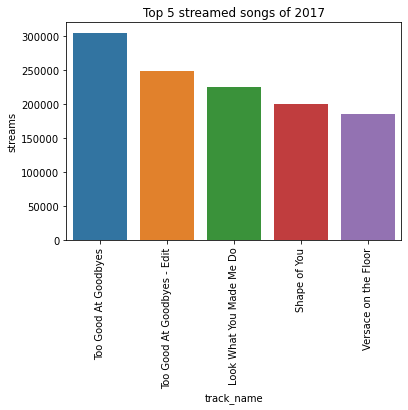

In [25]:
sns.barplot(data=top_5_2017,x = "track_name",y = "streams")
plt.xticks(rotation= 90)
plt.title("Top 5 streamed songs of 2017")
plt.show()

####  2018

In [26]:
daily_charts_2018 = daily_charts_2018.drop_duplicates("track_name")
top_5_2018 = daily_charts_2018.sort_values(by = "streams",ascending = False).head(5)
top_5_2018

,date,position,track_id,track_name,artist,streams,year,month,day
133796,2018-11-04,7,2rPE9A1vEgShuZxxzR2tZH,"thank u, next",Ariana Grande,177405,2018,11,4
72390,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),Camila Cabello,155633,2018,1,1
72391,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,2018,1,1
72392,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,2018,1,1
72393,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,2018,1,1


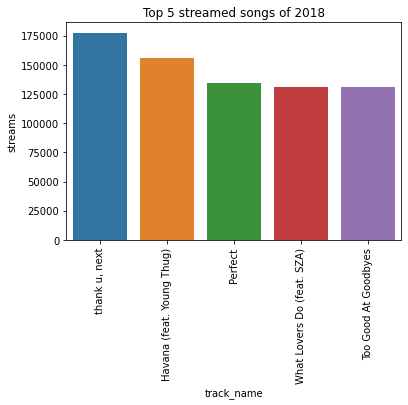

In [27]:
sns.barplot(data=top_5_2018,x = "track_name",y = "streams")
plt.xticks(rotation= 90)
plt.title("Top 5 streamed songs of 2018")
plt.show()

####  2019

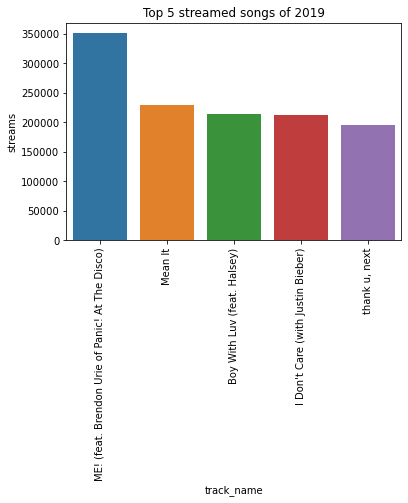

In [28]:
daily_charts_2019 = daily_charts_2019.drop_duplicates("track_name")
top_5_2019 = daily_charts_2019.sort_values(by = "streams",ascending = False).head(5)
sns.barplot(data=top_5_2019,x = "track_name",y = "streams")
plt.xticks(rotation= 90)
plt.title("Top 5 streamed songs of 2019")
plt.show()

#### 2020 

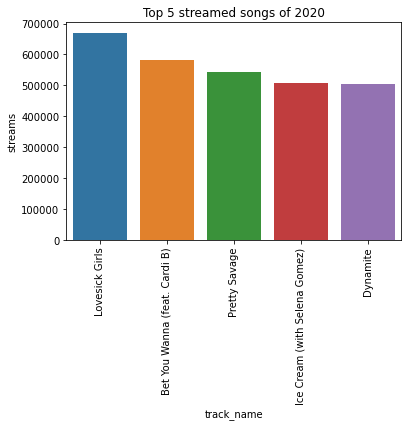

In [29]:
daily_charts_2020 = daily_charts_2020.drop_duplicates("track_name")
top_5_2020 = daily_charts_2020.sort_values(by = "streams",ascending = False).head(5)
sns.barplot(data=top_5_2020,x = "track_name",y = "streams")
plt.xticks(rotation= 90)
plt.title("Top 5 streamed songs of 2020")
plt.show()

### 2021

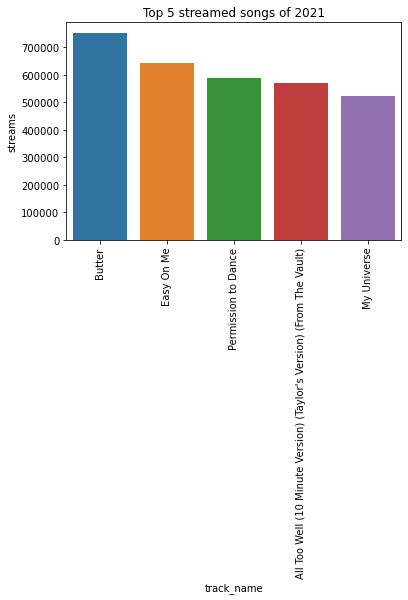

In [30]:
daily_charts_2021 = daily_charts_2021.drop_duplicates("track_name")
top_5_2021 = daily_charts_2021.sort_values(by = "streams",ascending = False).head(5)
sns.barplot(data=top_5_2021,x = "track_name",y = "streams")
plt.xticks(rotation= 90)
plt.title("Top 5 streamed songs of 2021")
plt.show()

In [31]:
top_5_2021

,date,position,track_id,track_name,artist,streams,year,month,day
319590,2021-05-21,1,3VqeTFIvhxu3DIe4eZVzGq,Butter,BTS,753286,2021,5,21
348790,2021-10-15,1,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Adele,641241,2021,10,15
329190,2021-07-09,1,0LThjFY2iTtNdd4wviwVV2,Permission to Dance,BTS,590130,2021,7,9
354390,2021-11-12,1,5enxwA8aAbwZbf5qCHORXi,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,568476,2021,11,12
344590,2021-09-24,1,3FeVmId7tL5YN8B7R3imoM,My Universe,Coldplay,523282,2021,9,24


#### 2022 : Up to 9/15/2022

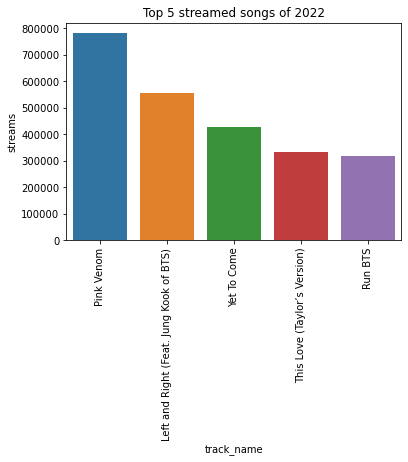

In [32]:
daily_charts_2022 = daily_charts_2022.drop_duplicates("track_name")
top_5_2022 = daily_charts_2022.sort_values(by = "streams",ascending = False).head(5)
sns.barplot(data=top_5_2022,x = "track_name",y = "streams")
plt.xticks(rotation= 90)
plt.title("Top 5 streamed songs of 2022")
plt.show()

In [33]:
top_5_2022

,date,position,track_id,track_name,artist,streams,year,month,day
410390,2022-08-19,1,0skYUMpS0AcbpjcGsAbRGj,Pink Venom,BLACKPINK,782316,2022,8,19
399190,2022-06-24,1,0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,553826,2022,6,24
396390,2022-06-10,1,10SRMwb9EuVS1K9rYsBfHQ,Yet To Come,BTS,427273,2022,6,10
389391,2022-05-06,2,4d1CG5ei1E2vGbvmgf5KKv,This Love (Taylor’s Version),Taylor Swift,332630,2022,5,6
396392,2022-06-10,3,69xohKu8C1fsflYAiSNbwM,Run BTS,BTS,316056,2022,6,10


#### Most Streamed Artisits from 2017-2022

In [34]:
top_ten_artisits = daily_charts.groupby(by = "artist")["streams"].sum().sort_values(ascending = False).head(20).to_frame()
top_ten_artisits

,streams
artist,
Ben&Ben,913820324
Taylor Swift,567121184
Ed Sheeran,563277361
December Avenue,514362119
LANY,495949117
Moira Dela Torre,470145590
BTS,437258393
Ariana Grande,406589773
Zack Tabudlo,370307235


# Data Manipulation for ML: Trying to predict popularity

In [35]:
daily_charts_tracks["track_id"] = daily_charts_tracks["track_id"].astype(str)

In [36]:
daily_charts["track_id"] = daily_charts["track_id"].astype(str)

In [37]:
daily_charts_tracks = daily_charts_tracks.set_index("track_id")

daily_charts = daily_charts.set_index("track_id")



In [38]:
test = daily_charts_tracks.merge(daily_charts, on = "track_name",how = "left")


In [39]:
groupped_and_summed = test.groupby(by = ["track_name",'artist_id', 'artist_name', 'album_id', 'duration',
       'release_date', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'], as_index= False)["streams"].sum()

In [40]:
groupped_and_summed.head(5)

,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams
0,'Di Lahat,1dpv0XBdgUa5z4vzn7ahIz,Donnalyn,3QxcPmbxKj6qFK3NqDexA7,234893,2018-10-05,0,0.686,0.731,6.0,-6.765,1.0,0.0428,0.28100,0.021900,0.0964,0.433,94.008,1842188.0
1,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,0pFRzLxgSt9QlXKuukR8A4,340262,2019-02-03,3,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.1120,0.140,76.132,61335104.0
2,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,7zJxOlHuAGpCC7ZtKHm0Rz,340262,2019-02-03,0,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.1120,0.140,76.132,61335104.0
3,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,1hwjIPHrnNBFuxWBWRHmge,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.19200,0.000000,0.0914,0.352,88.690,102548262.0
4,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,4u7nLwDVRz7z0mxweMbVZ6,207018,2018-04-06,2,0.413,0.561,1.0,-3.092,1.0,0.0517,0.19200,0.000000,0.0914,0.352,88.690,102548262.0


In [41]:
#groupped_and_summed["popularity"] = groupped_and_summed["popularity"] / 100

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
x_features = groupped_and_summed[['duration',
      'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo',"streams"]]
y_feature = groupped_and_summed[["popularity"]]

In [44]:
scaler = MinMaxScaler()
x_features[['duration',
      'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo',"streams"]] = scaler.fit_transform(x_features)
y_feature = scaler.fit_transform(y_feature)

C:\Users\harsmith\AppData\Local\Temp\ipykernel_44980\714970234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_features[['duration',


In [45]:
x_features

,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams
0,0.342819,0.635236,0.727085,0.545455,0.715865,1.0,0.022770,0.282695,0.022765,0.080236,0.423890,0.264172,0.005286
1,0.525946,0.228288,0.422245,0.909091,0.695394,1.0,0.013592,0.008238,0.000973,0.096947,0.114165,0.155537,0.175986
2,0.525946,0.228288,0.422245,0.909091,0.695394,1.0,0.013592,0.008238,0.000973,0.096947,0.114165,0.155537,0.175986
3,0.294373,0.296526,0.552008,0.090909,0.866244,1.0,0.033109,0.193158,0.000000,0.074879,0.338266,0.231854,0.294237
4,0.294373,0.296526,0.552008,0.090909,0.866244,1.0,0.033109,0.193158,0.000000,0.074879,0.338266,0.231854,0.294237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,0.330714,0.419355,0.522142,0.545455,0.713572,1.0,0.003950,0.126759,0.000000,0.087306,0.265328,0.187266,0.068020
4455,0.281955,0.764268,0.852729,1.000000,0.805977,0.0,0.050302,0.001165,0.000044,0.329405,0.719873,0.452501,0.025491
4456,0.281955,0.764268,0.852729,1.000000,0.805977,0.0,0.050418,0.001165,0.000044,0.329405,0.719873,0.452513,0.003993
4457,0.286416,0.517370,0.816684,0.363636,0.848229,1.0,0.057853,0.173037,0.000000,0.111944,0.572939,0.349853,0.000616


In [46]:
y_feature

array([[0.        ],
       [0.03125   ],
       [0.        ],
       ...,
       [0.        ],
       [0.66666667],
       [0.        ]])

# Correlation of Features

In [47]:

corr = x_features.corr()
corr.style.background_gradient(cmap="coolwarm")

,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams
duration,1.000000,-0.221533,-0.148271,-0.013557,-0.139532,0.104828,-0.142902,0.094416,-0.061117,-0.071604,-0.247115,-0.001617,0.087429
danceability,-0.221533,1.000000,0.255626,0.007398,0.258516,-0.143345,0.181143,-0.289360,-0.037261,-0.051887,0.449783,-0.114639,0.000202
energy,-0.148271,0.255626,1.000000,-0.006280,0.780053,-0.178973,0.133630,-0.686780,-0.051381,0.133522,0.421083,0.108925,-0.156437
key,-0.013557,0.007398,-0.006280,1.000000,-0.011361,-0.118972,0.038243,0.000381,-0.018711,-0.007966,0.015852,-0.029907,0.036892
loudness,-0.139532,0.258516,0.780053,-0.011361,1.000000,-0.159706,0.041527,-0.572343,-0.146726,0.046486,0.331504,0.065918,-0.080621
mode,0.104828,-0.143345,-0.178973,-0.118972,-0.159706,1.000000,-0.123141,0.158609,-0.008221,-0.032860,-0.092808,-0.008381,0.095178
speechiness,-0.142902,0.181143,0.133630,0.038243,0.041527,-0.123141,1.000000,-0.108870,-0.023366,0.061839,0.134668,0.098053,-0.067389
acousticness,0.094416,-0.289360,-0.686780,0.000381,-0.572343,0.158609,-0.108870,1.000000,0.037145,-0.066698,-0.238746,-0.092947,0.114406
instrumentalness,-0.061117,-0.037261,-0.051381,-0.018711,-0.146726,-0.008221,-0.023366,0.037145,1.000000,-0.004478,-0.079964,-0.021957,-0.042472
liveness,-0.071604,-0.051887,0.133522,-0.007966,0.046486,-0.032860,0.061839,-0.066698,-0.004478,1.000000,0.022640,0.000501,-0.065691


# Split Test and Train

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_features.to_numpy(), y_feature, test_size = 0.2,random_state=42)

# Linear Regression

In [50]:
from sklearn import linear_model
import sklearn.metrics as sm

In [51]:
regression = linear_model.LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = regression.predict(x_test)

In [53]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.27
Mean squared error = 0.1
Median absolute error = 0.25
Explain variance score = 0.0
R2 score = 0.0


# Logisitic Regression

#### Changing the Y to from between 0 -1 to either 0 or 1 based on if it is > 0.5

In [54]:
logisitc_y_train =[]
logisitc_y_test = []
for x in y_train:
    if x < 0.5:
        logisitc_y_train.append(0)
    else:
        logisitc_y_train.append(1)
for z in y_test:
        if z < 0.5:
            logisitc_y_test.append(0)
        else:
            logisitc_y_test.append(1)

In [55]:
model = linear_model.LogisticRegression(solver="liblinear")
model.fit(x_train,logisitc_y_train)

LogisticRegression(solver='liblinear')

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
model.intercept_

array([-0.59368575])

In [58]:
model.coef_

array([[-0.41527118, -0.09790715, -0.58137554, -0.08252234,  1.76973811,
         0.0253329 ,  0.01543808,  0.30563809,  0.31247066, -0.15783373,
         0.42340244,  0.33614061,  0.8089329 ]])

In [59]:
model.score(x_test,logisitc_y_test)

0.6210762331838565

In [60]:
confusion_matrix(logisitc_y_test,model.predict(x_test))

array([[  2, 335],
       [  3, 552]], dtype=int64)

In [61]:
print(classification_report(logisitc_y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.40      0.01      0.01       337
           1       0.62      0.99      0.77       555

    accuracy                           0.62       892
   macro avg       0.51      0.50      0.39       892
weighted avg       0.54      0.62      0.48       892



# Decision Tree

In [62]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [63]:
my_tree = tree.DecisionTreeRegressor()

In [64]:
my_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
predictions = my_tree.predict(X=x_test)


In [66]:
my_tree.score(x_test,y_test)

-0.8029924184735213

# Random Forest

In [67]:
from sklearn.ensemble import BaggingRegressor

In [68]:
RandomForest = BaggingRegressor()

In [69]:
RandomForest.fit(x_train,y_train)

C:\Users\harsmith\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor()

In [70]:
y_pred_rf = RandomForest.predict(x_test)

In [71]:
RandomForest.score(x_test,y_test)

-0.1240405525751147

# Neural Network: Sequential

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

In [73]:
model = Sequential()
#model.add(Dense(, input_shape=(13,), activation = "relu"))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8,activation = "sigmoid"))
model.add(Dense(1, activation='sigmoid'))

In [74]:
mse = MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(loss=mse, optimizer=opt , metrics=['accuracy'])

In [75]:
history = model.fit(x_train, y_train, epochs=100, batch_size=20,verbose = 0)

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


# XGBOOST: BEST MODEL

In [77]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
xbg_r = xg.XGBRegressor(objective = "reg:squarederror",n_estimators = 10)

In [79]:
history = xbg_r.fit(x_train,y_train)

In [80]:
pred = xbg_r.predict(x_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
print("MSE:", round(MSE(y_test,pred),5))

RMSE :  0.309263
MSE: 0.09564


# Data Manipulation: Move to Power BI

In [92]:
groupped_and_summed.sort_values("popularity",ascending = False).head(5)

,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams
1582,I Ain't Worried,5Pwc4xIPtQLFEnJriah9YJ,OneRepublic,04PEOM6kIEeq9lRp1asNP2,148485,2022-05-13,96,0.704,0.797,0.0,-5.927,1.0,0.0475,0.08260,0.000745,0.0546,0.825,139.994,8972300.0
261,As It Was,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2pqdSWeJVsXAhHFuVLzuA8,167303,2022-03-31,96,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,62416012.0
1690,I'm Good (Blue),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,7M842DMhYVALrXsw3ty7B3,175238,2022-08-26,96,0.561,0.965,7.0,-3.673,0.0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,1381376.0
1299,Glimpse of Us,3MZsBdqDrRTJihTHQrO6Dq,Joji,6ZZvx0aefZV3LKa053fn71,233456,2022-06-10,95,0.440,0.317,8.0,-9.258,1.0,0.0531,0.89100,0.000005,0.1410,0.268,169.914,57919078.0
3844,Under The Influence,7bXgB6jMjp9ATFy66eO08Z,Chris Brown,3okhA6w5uau6ZNhnVpwVww,184613,2019-10-04,95,0.733,0.690,9.0,-5.529,0.0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,12880556.0


In [82]:
daily_charts_artists2 = daily_charts_artists[["genres","artist_name"]]


In [83]:
genres_and_data = daily_charts_artists2.merge(groupped_and_summed,on="artist_name",how = "inner").drop_duplicates()

In [84]:
genres_and_data["genres"] = genres_and_data["genres"].str.replace("[","",regex = False).str.replace("]","",regex = False)

In [91]:
genres_and_data.to_csv("C:\\Users\\harsmith\\Documents\\Spotify_Data_Science_Project\\genres_and_data.csv")